In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 1.Reading Dataset Using Pandas

In [2]:
data = pd.read_csv('RTA Dataset.csv')

In [3]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

# 2.Shape of Dataset

In [4]:
data.shape

(12316, 32)

Inference:
    
RTA Dataset has 12316 occurences and 32 featu

# 3.Columns of Dataset

In [5]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# 4. Summarized information of columns in Dataset¶

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Inference:
As per Information of feature values and data visibility, 16 columns has null values (containing no value) and the rest 15 too may have unnecessary values but they atleast have some value.

# 5.Summary of Dataset

In [7]:
data.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

Inference:
As per the information of features and description of dataset above, One thing was clear that from the entire features list only two columns are of numerical category and rest all are of categorical/string category.

In [8]:
# Checking for any duplicate rows:

data.duplicated(subset=None, keep='first').sum()

0

Inference: No duplicate rows

# 6.Exploratory Data Analysis

In [9]:
# Examining target variable:

data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

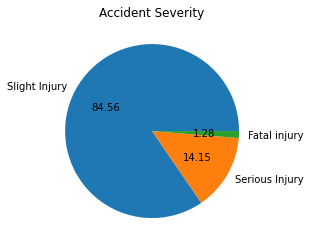

In [10]:
# pie plot of the target variable:

data['Accident_severity'].value_counts().plot(kind="pie", autopct="%.2f");
plt.title("Accident Severity")
plt.ylabel(' ')
plt.show()

INFERENCE:84% of accidents led to slight injuries.

In [11]:
# CHECKING THE PERCENTAGE OF ACCIDENT SEVERITY:
data['Accident_severity'].value_counts()/len(data['Accident_severity'])*100

Slight Injury     84.564794
Serious Injury    14.152322
Fatal injury       1.282884
Name: Accident_severity, dtype: float64

In [12]:
data['Age_band_of_driver'].value_counts()/len(data['Age_band_of_driver'])*100

18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: Age_band_of_driver, dtype: float64

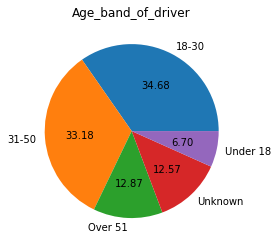

In [13]:
data['Age_band_of_driver'].value_counts().plot(kind="pie", autopct="%.2f");
plt.title("Age_band_of_driver")
plt.ylabel(' ')
plt.show()

INFERENCE:35% of the accident occured to drivers in age band 18-30 and 33% for drivers in age band 31-50.

In [14]:
data['Sex_of_driver'].value_counts()/len(data['Sex_of_driver'])*100

Male       92.862943
Female      5.691783
Unknown     1.445274
Name: Sex_of_driver, dtype: float64

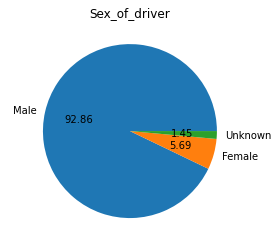

In [15]:
data['Sex_of_driver'].value_counts().plot(kind="pie", autopct="%.2f");
plt.title("Sex_of_driver")
plt.ylabel(' ')
plt.show()

INFERENCE:  94% of accidents occured to male drivers.

# 7. Data Visualization

In [16]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

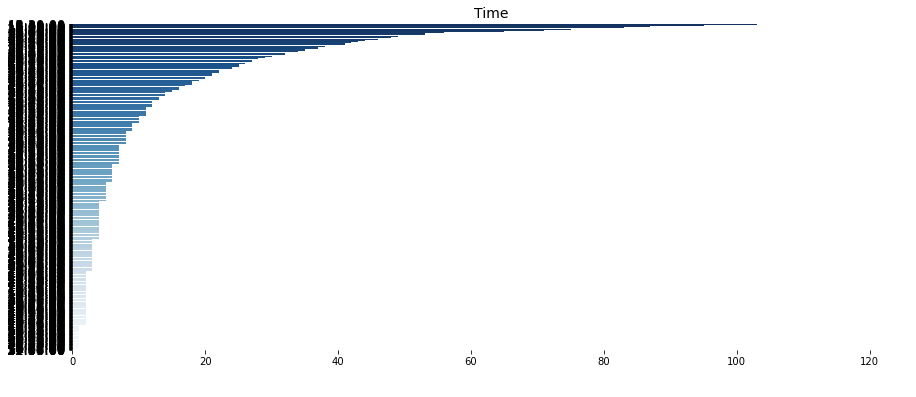

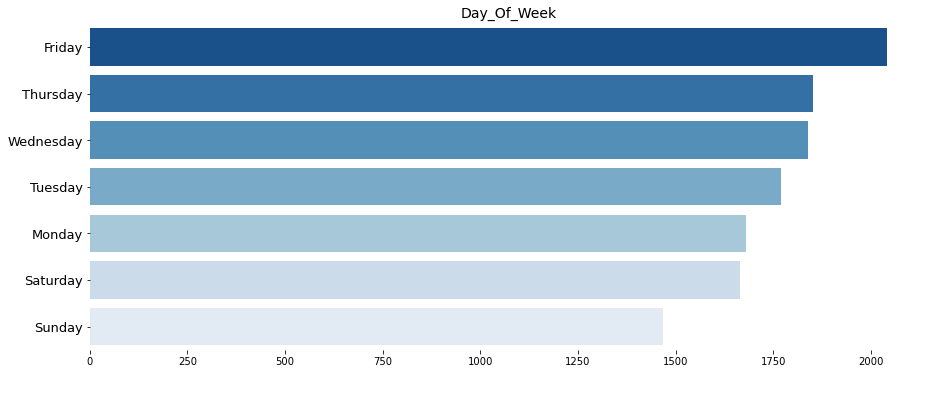

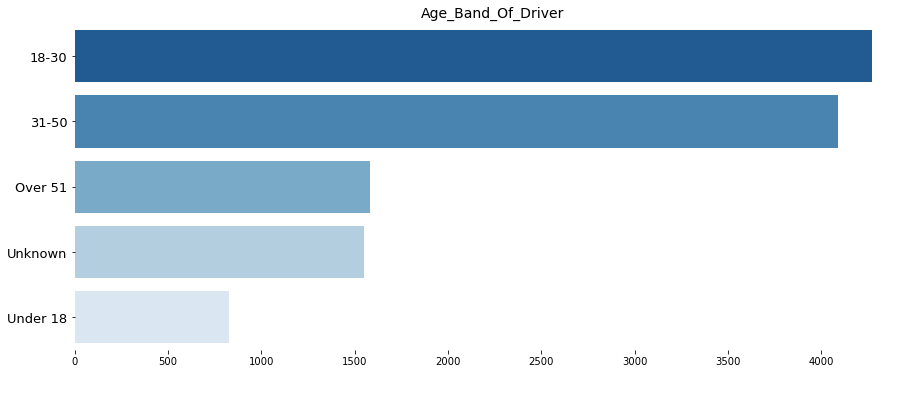

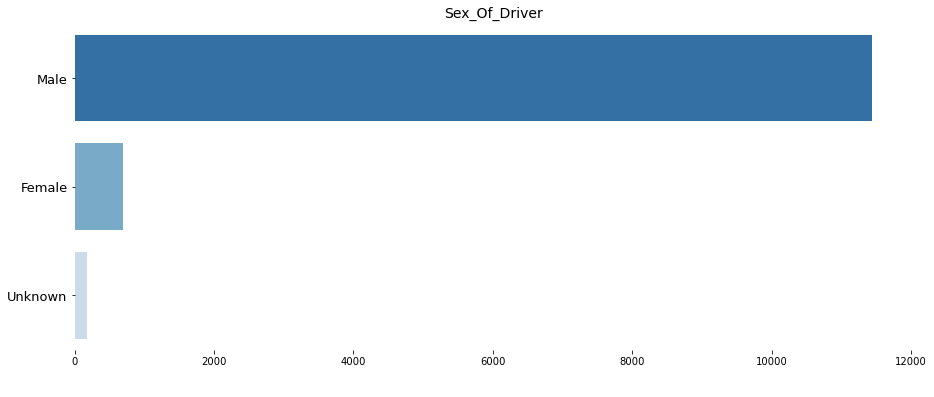

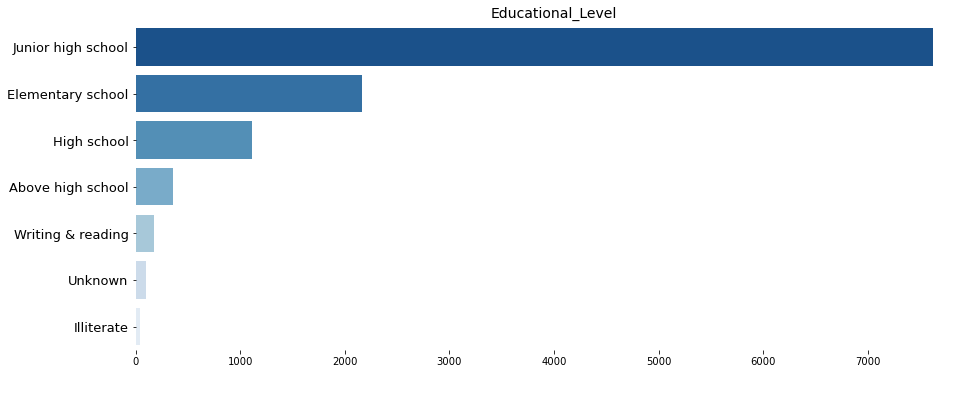

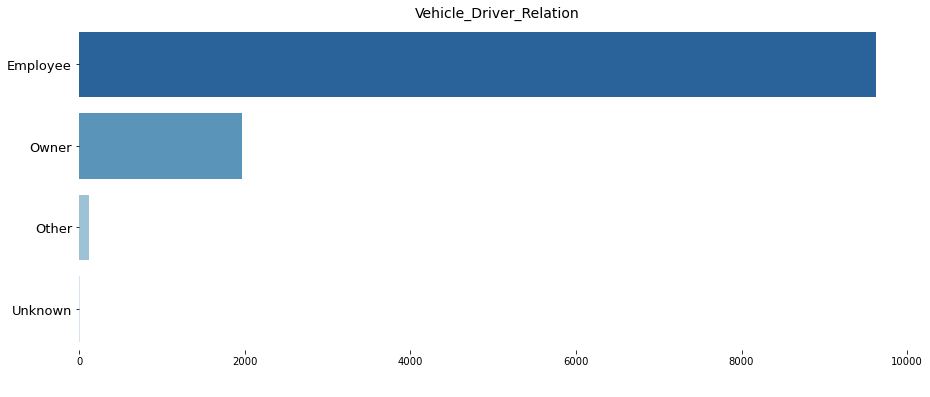

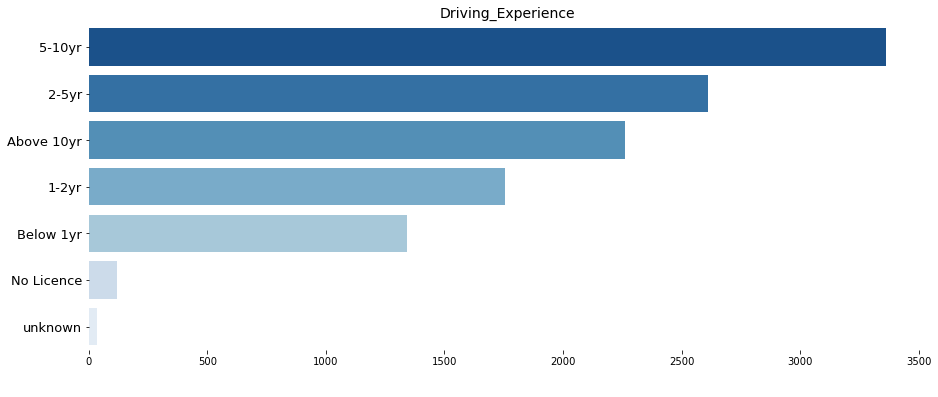

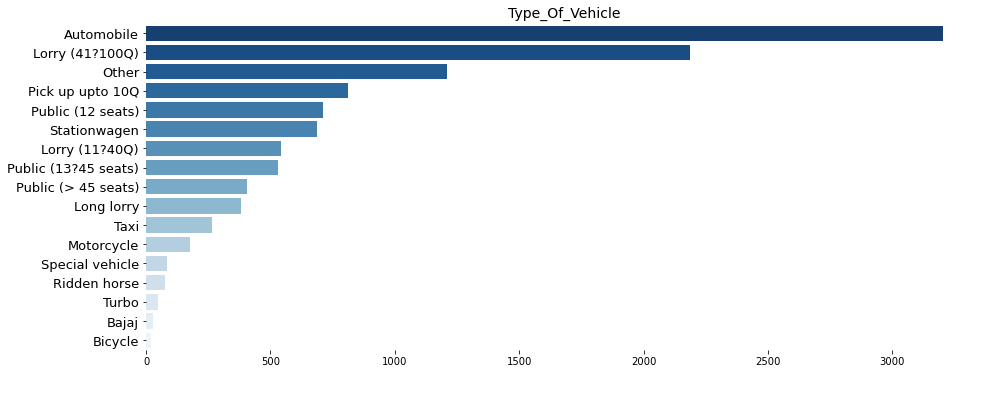

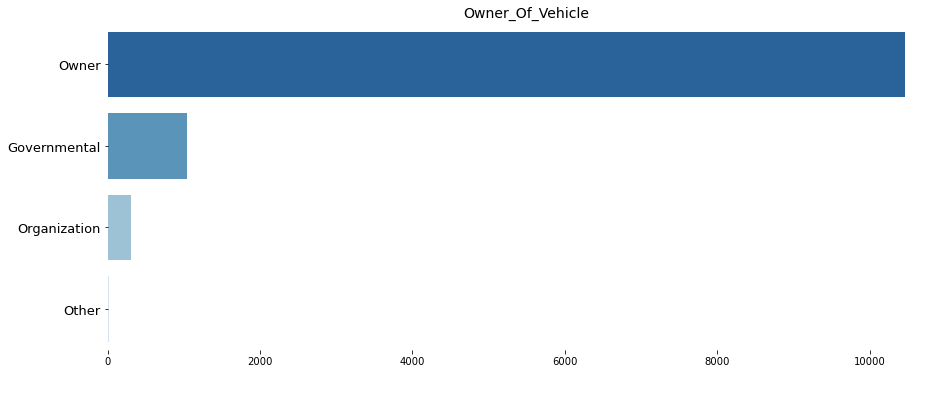

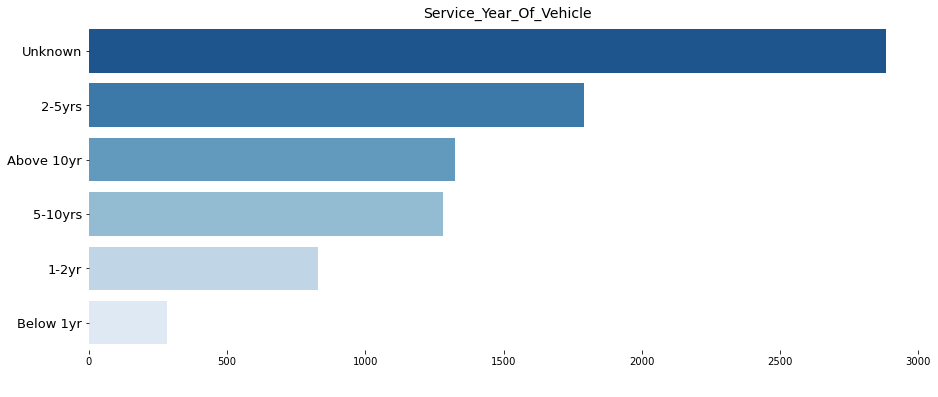

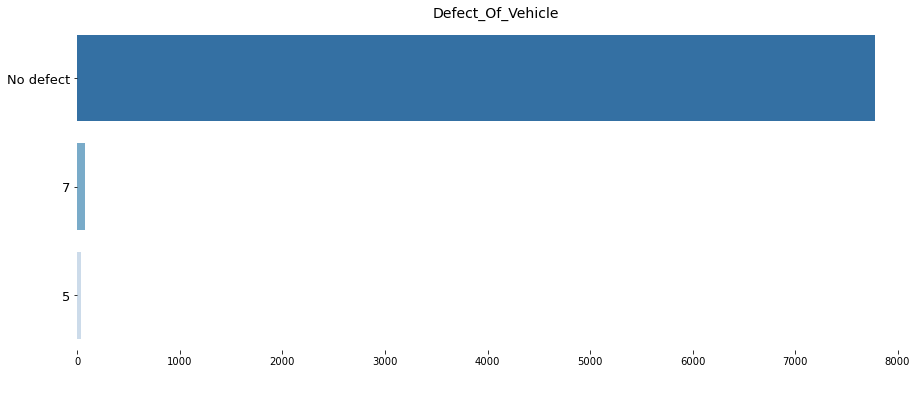

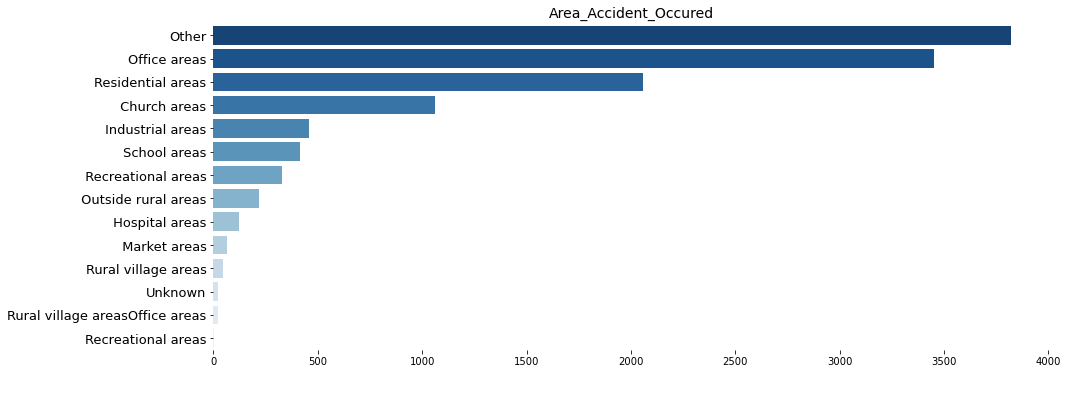

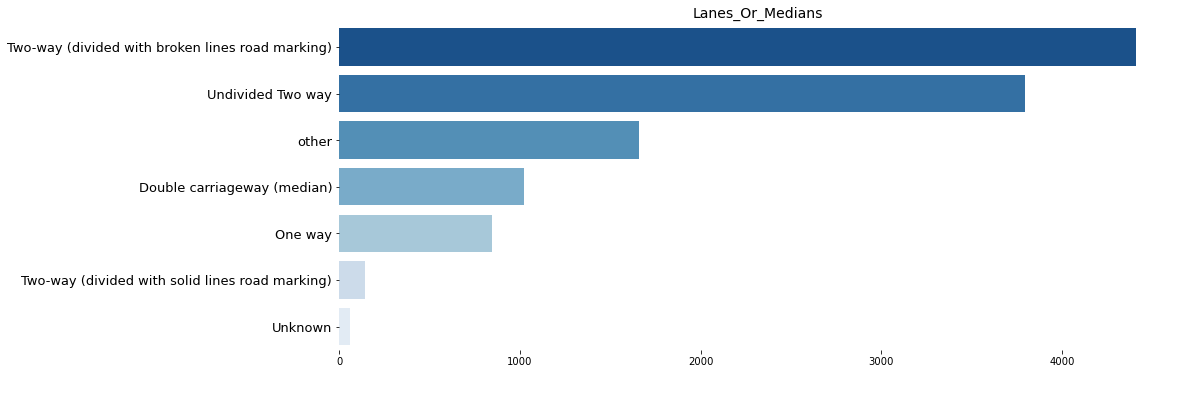

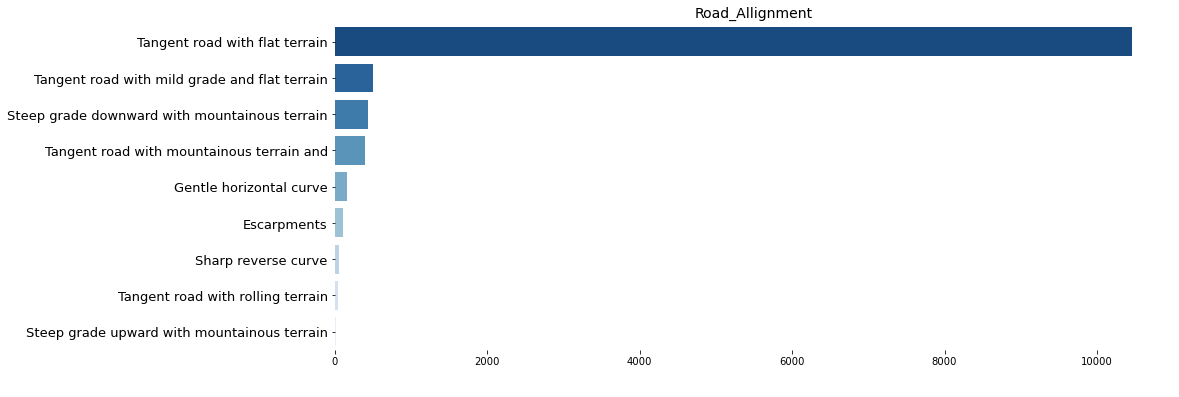

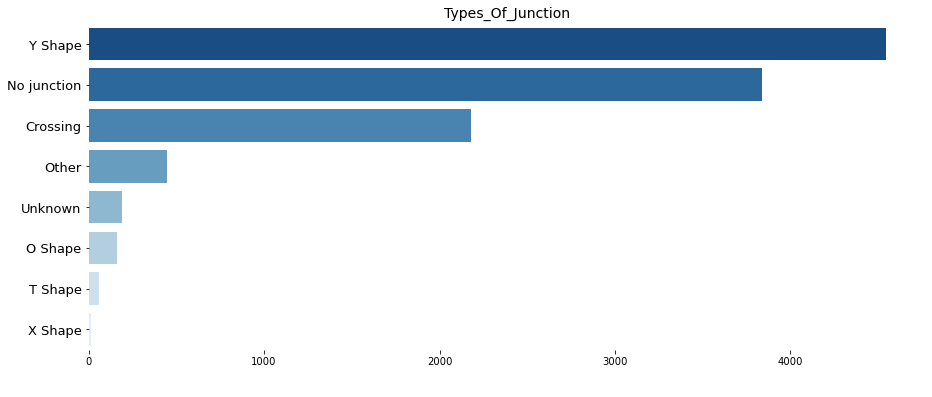

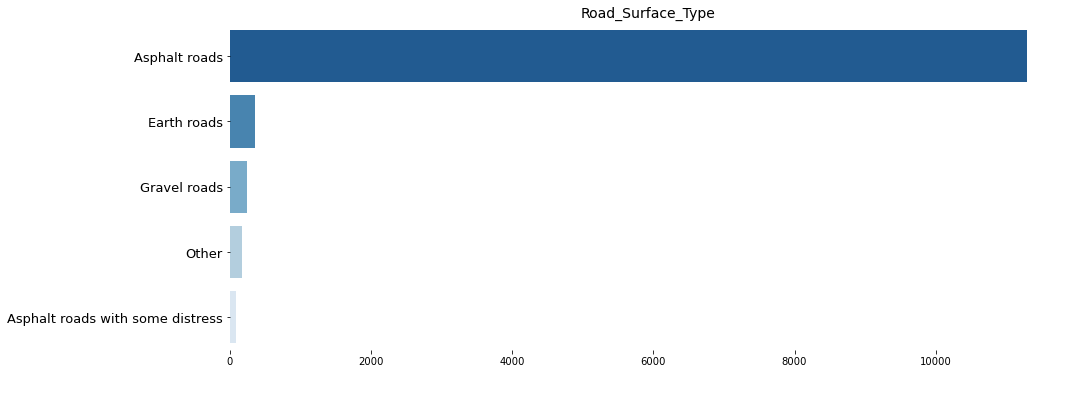

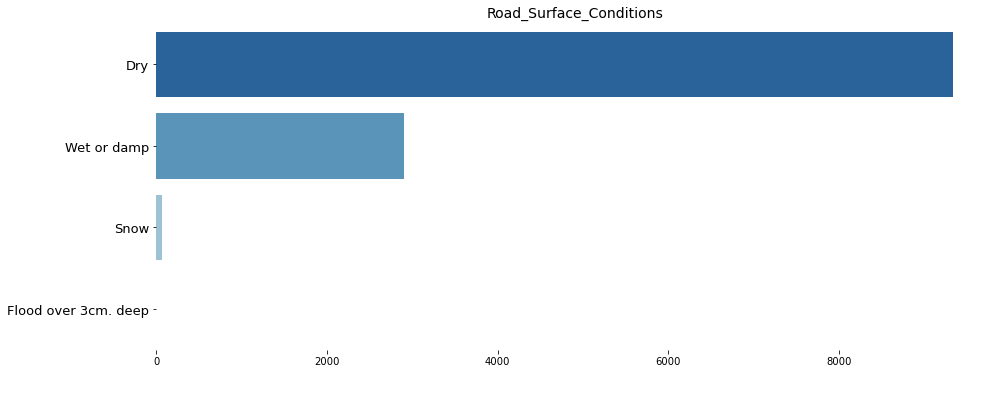

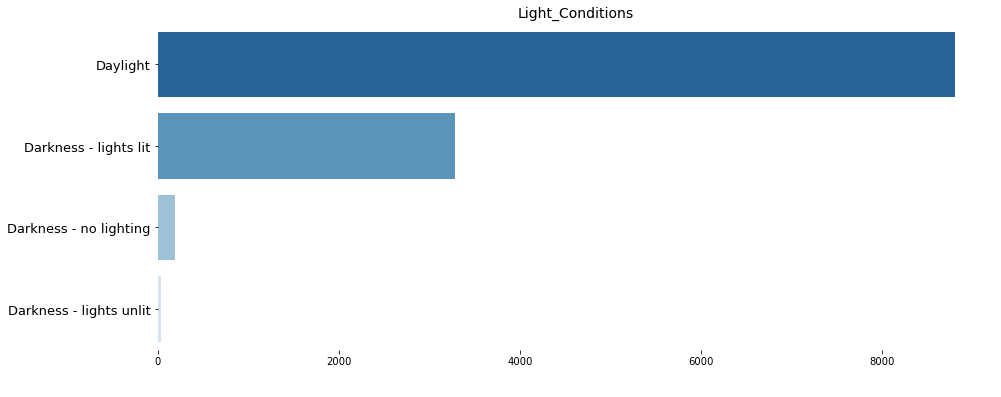

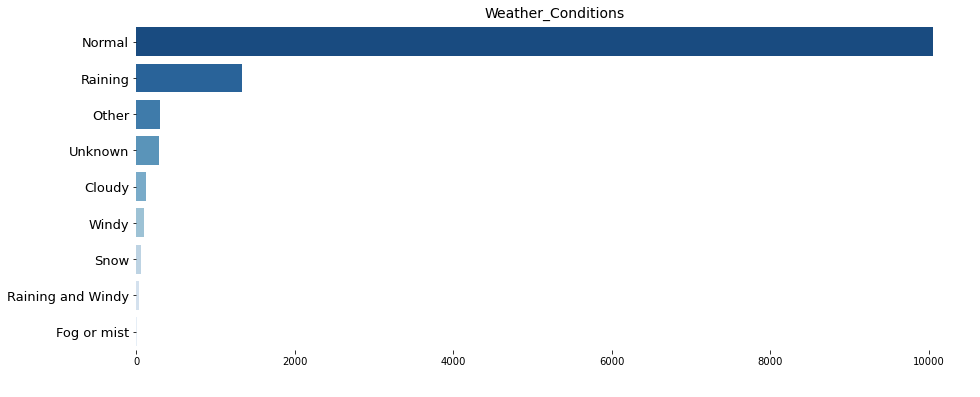

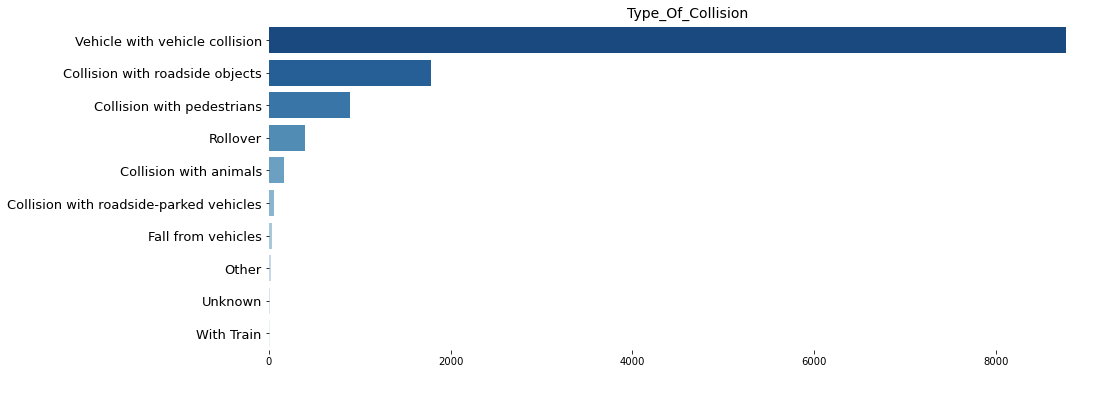

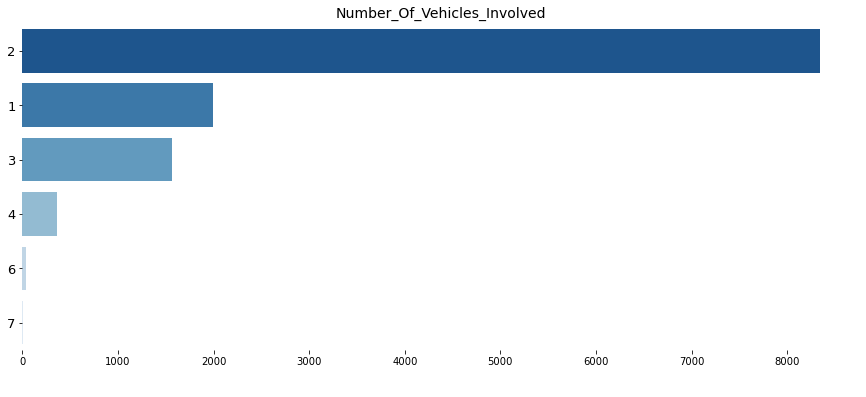

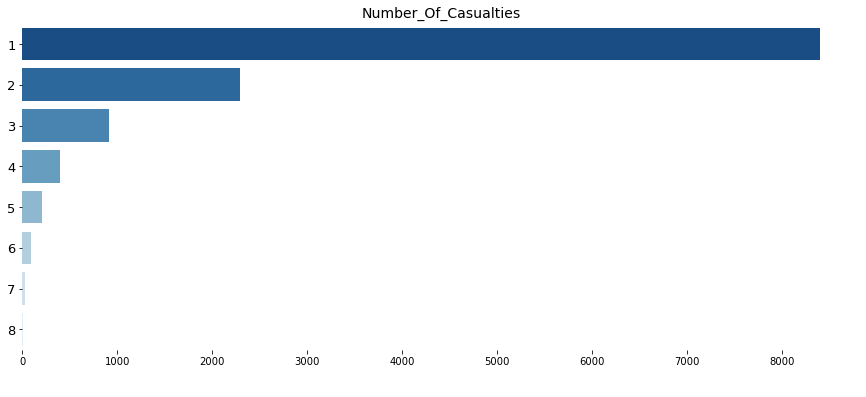

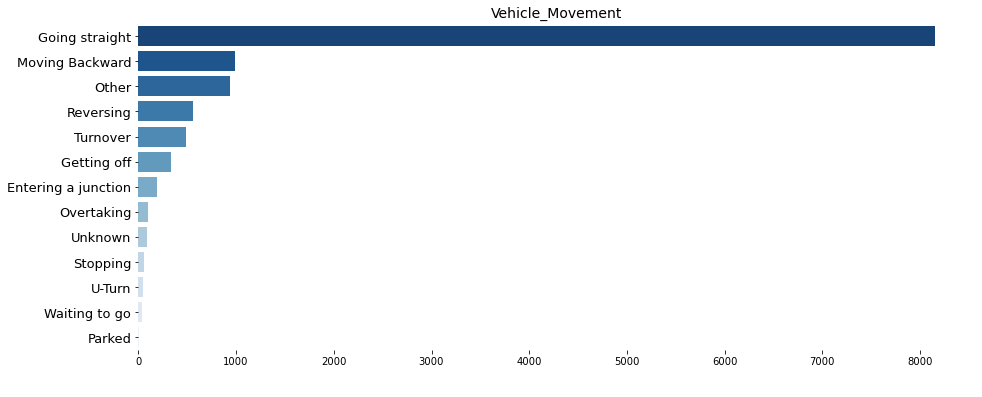

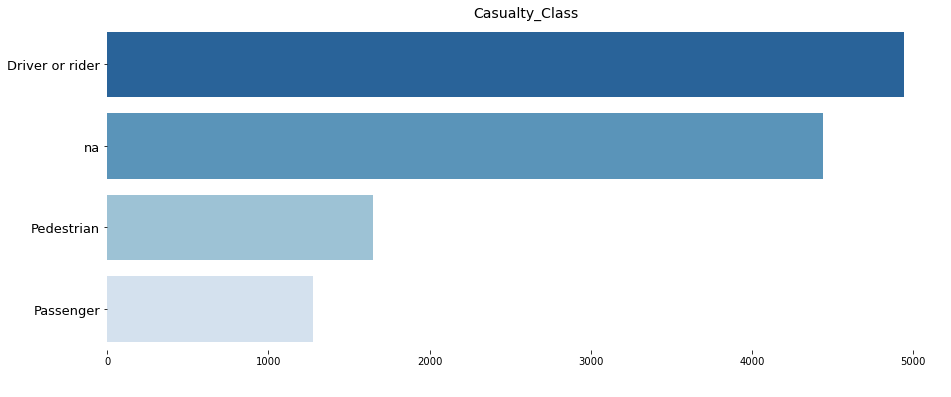

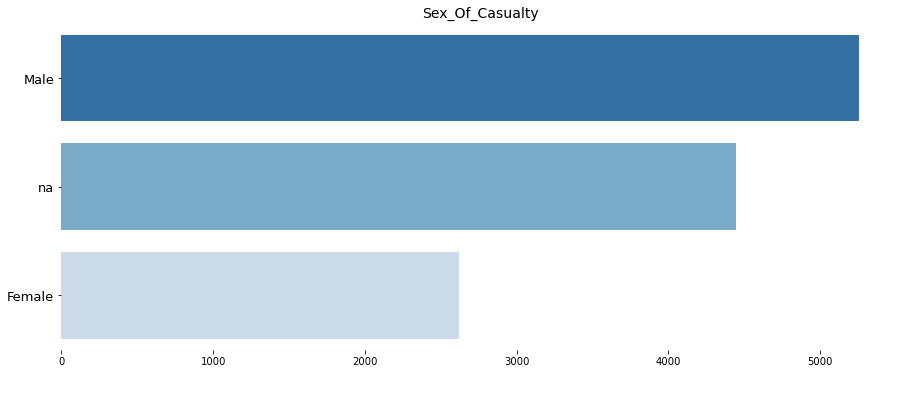

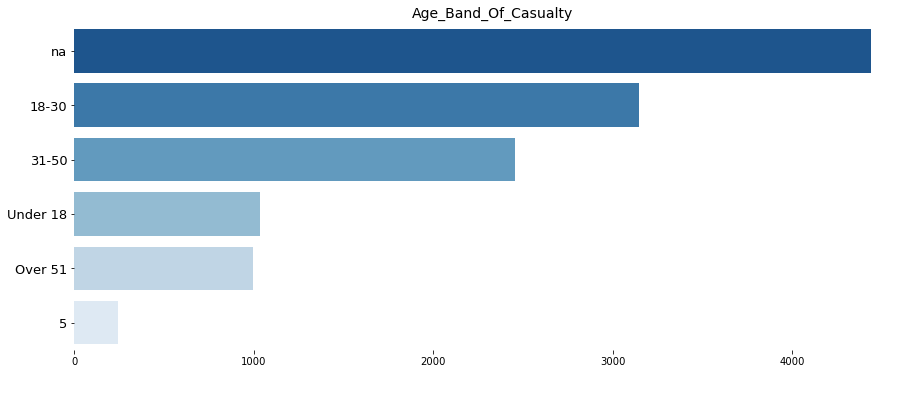

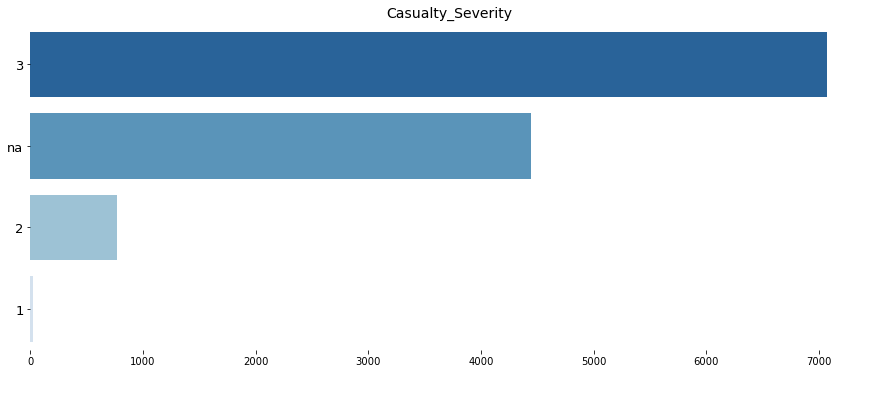

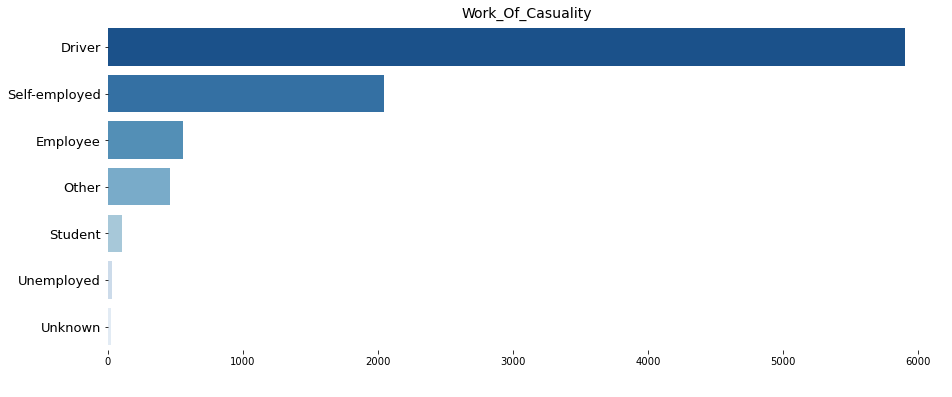

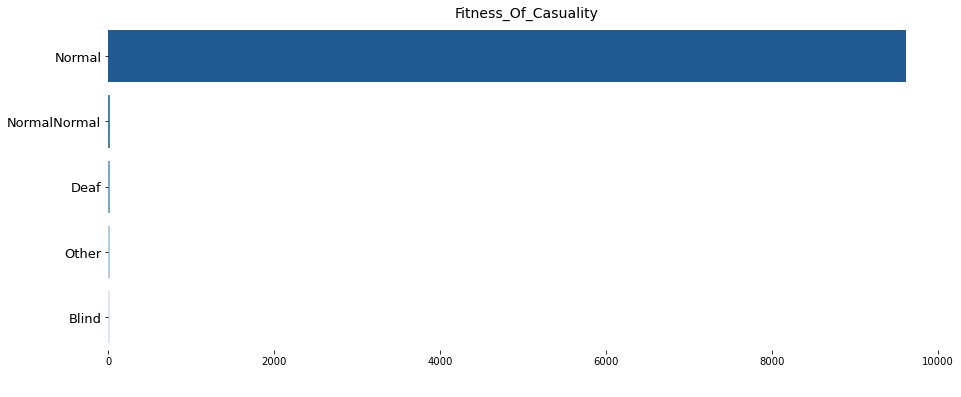

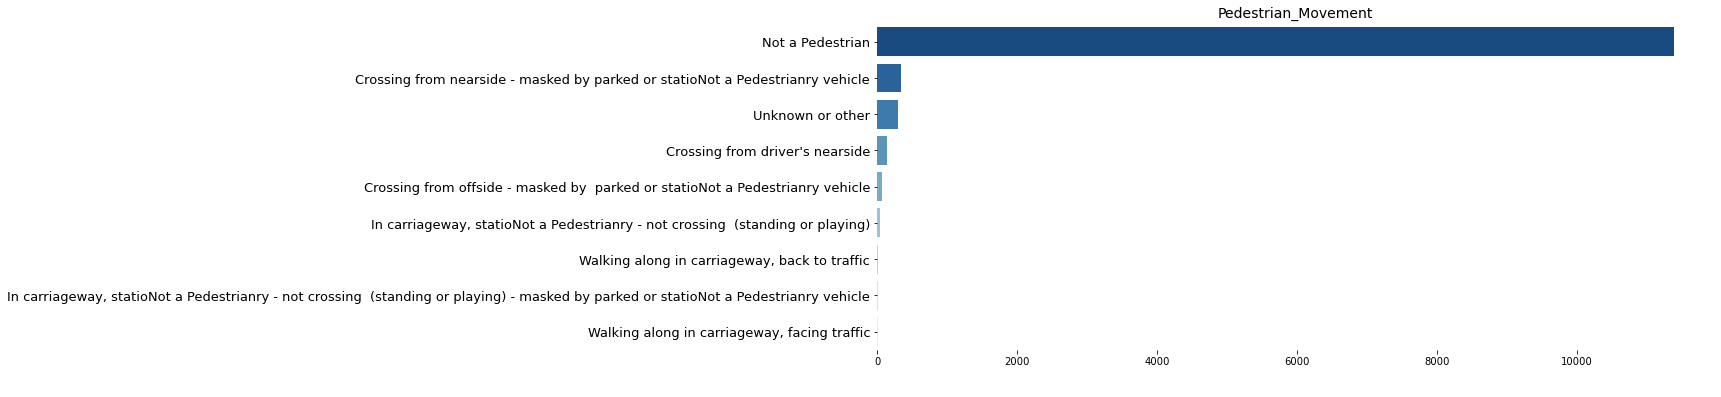

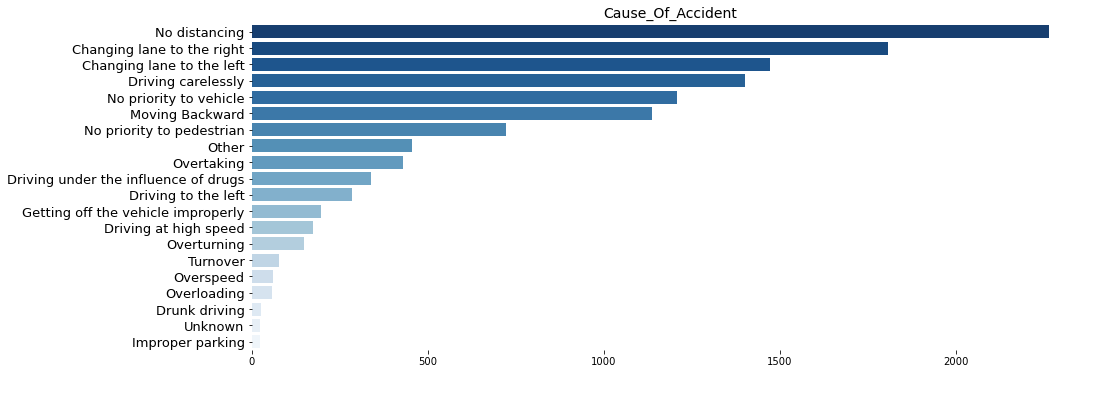

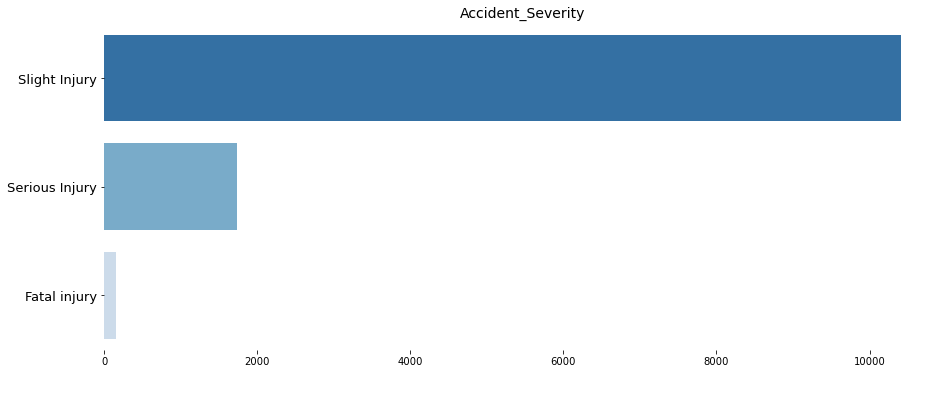

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [17]:
columns = data.columns
for i in columns:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.countplot(y = data[i][1:],data=data.iloc[1:], order=data[i][1:].value_counts().index, palette='Blues_r')
    plt.xlabel(' ', fontsize=20)
    plt.ylabel('')
    plt.title(i.title(),fontsize=14)
    plt.yticks(fontsize=13)
    plt.box(False)
    plt.show()
plt.tight_layout



# Observations:

Accidents: Accidents occured mostly on fridays and least on Sundays. Most of the accidents occured on 8AM and between 3PM to 6PM (Office and school hours) 85% of the severity is Slight injury

Driver: 35% of the accident occured to drivers in age band 18-30 and 33% for drivers in age band 31-50. 94% of accidents occured to male drivers. Accidents occured mostly to persons having Junior High school educational background

Road: Accidents occured mostly on lanes having two-way (divided with broken lines road marking). Road alignment were accident occured mostly was tangent road with flat terrain with Yshaped type of Junction.



In [18]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# 7(a) Visualization of distribution of Target Variable

In [19]:
data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

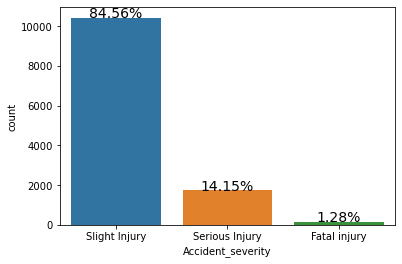

In [20]:

s = sns.countplot(x = 'Accident_severity',data = data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14) 


INFERENCE:

* 84% of accidents led to slight injuries.

* There is large difference between Slight Injuries and Serious Injuries.

* Only 1.3% of people died in accidents. Instant deaths are less, most people survived with slight injuries and few survived with very serious injuries

C:\Users\sudhe\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


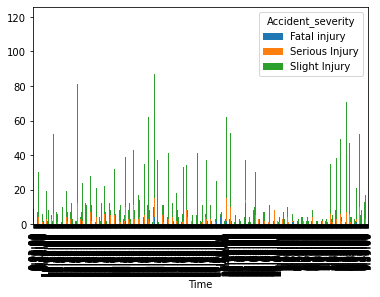

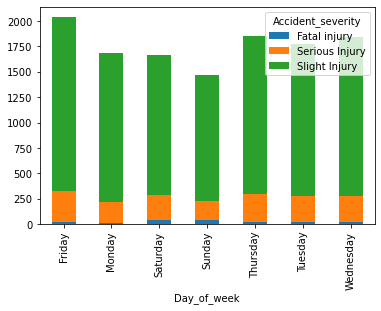

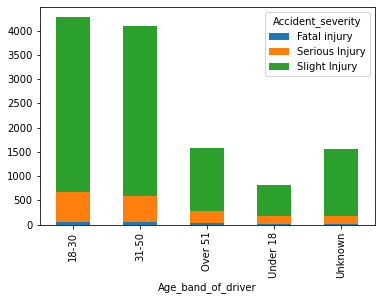

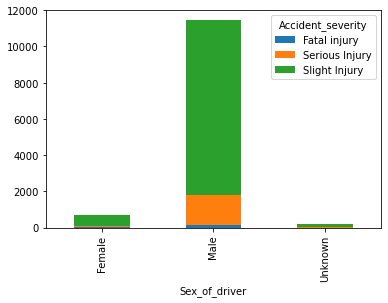

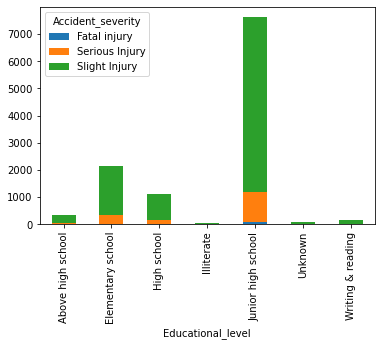

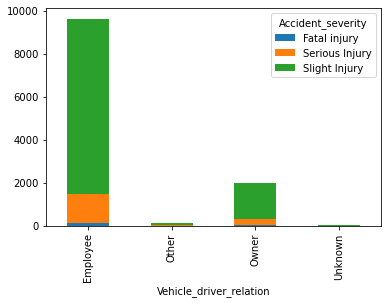

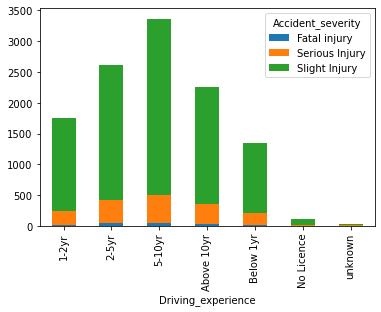

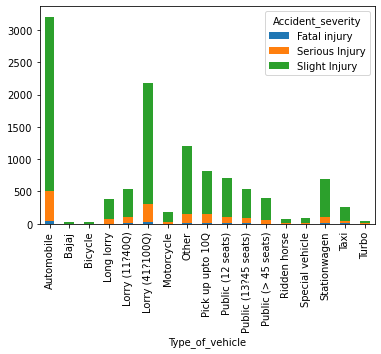

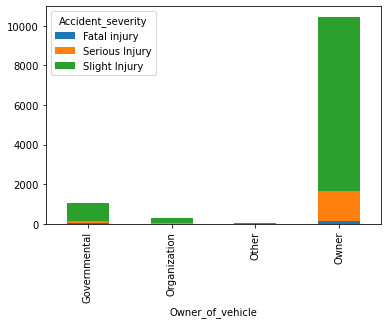

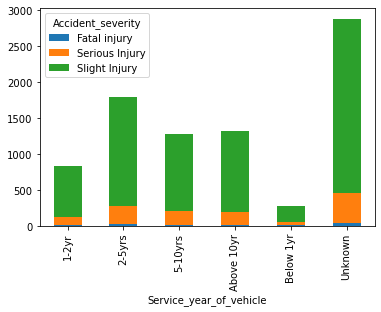

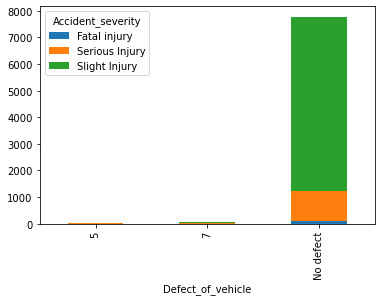

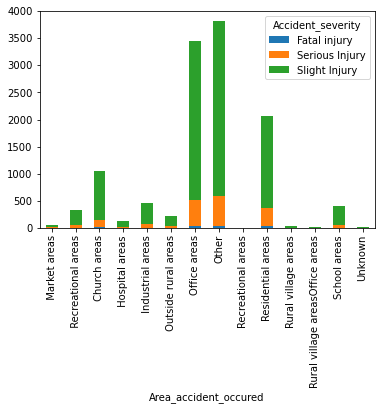

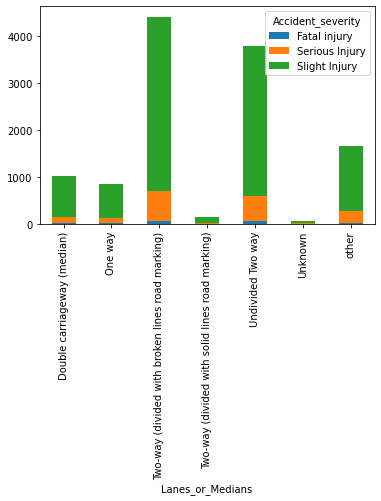

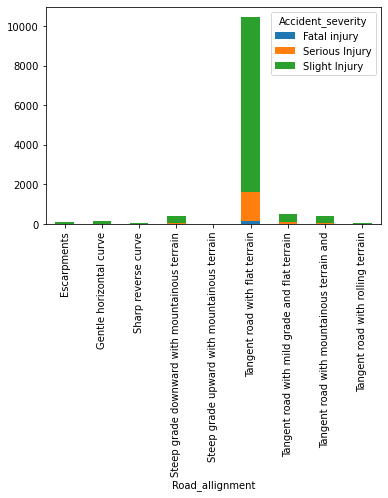

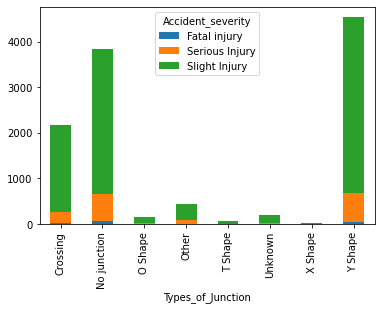

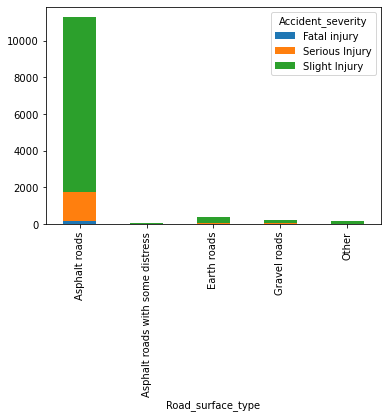

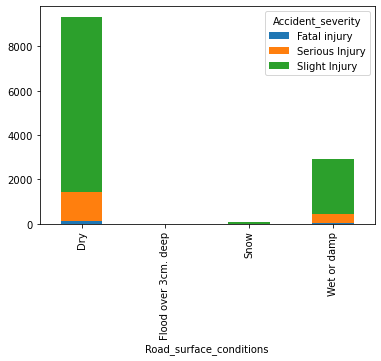

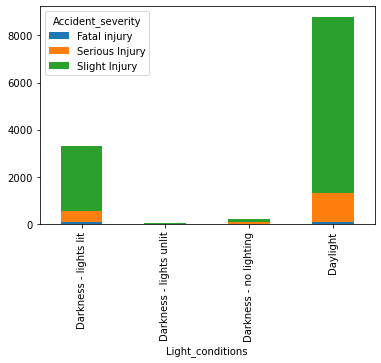

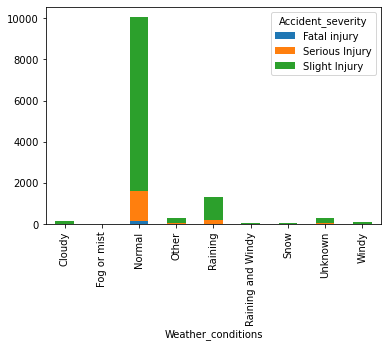

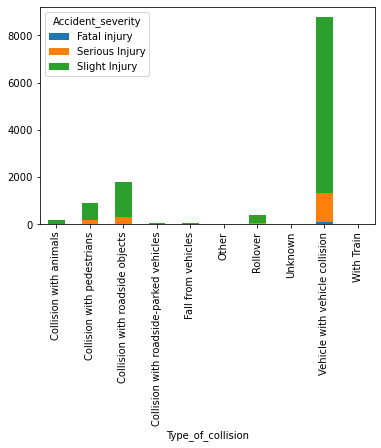

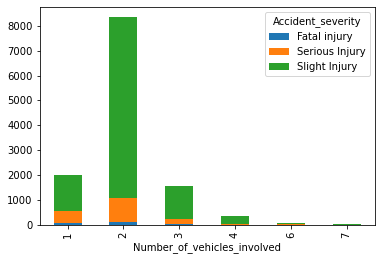

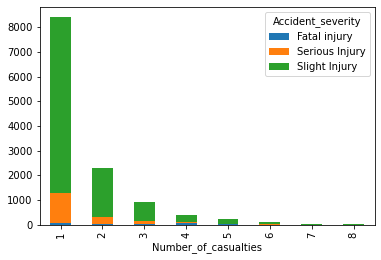

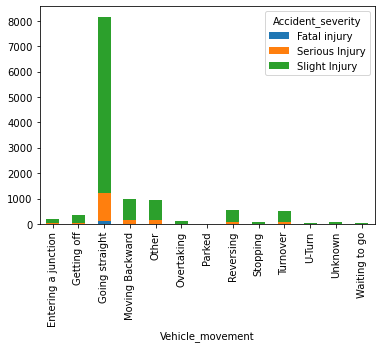

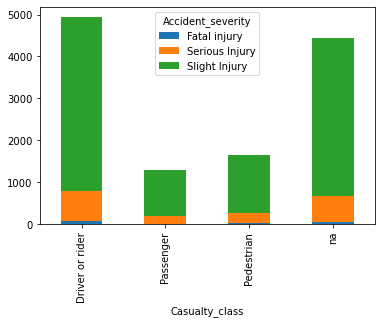

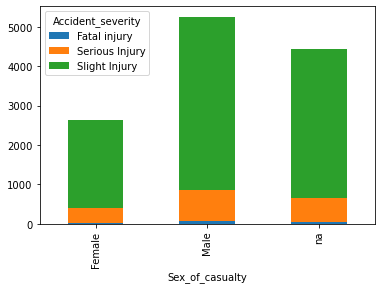

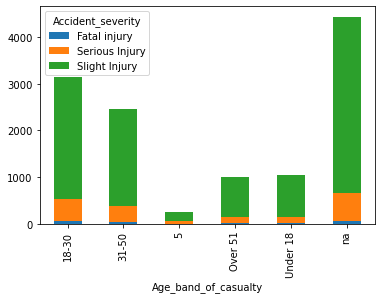

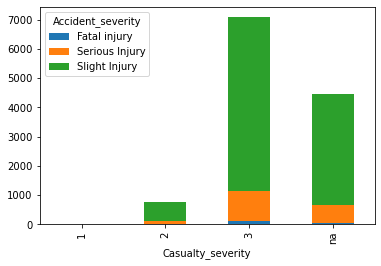

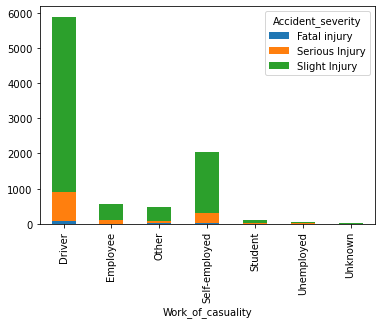

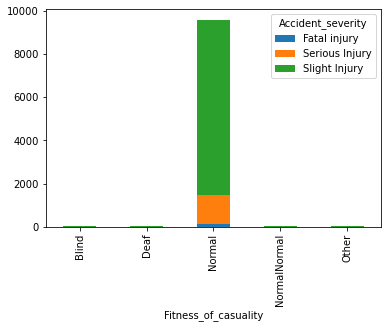

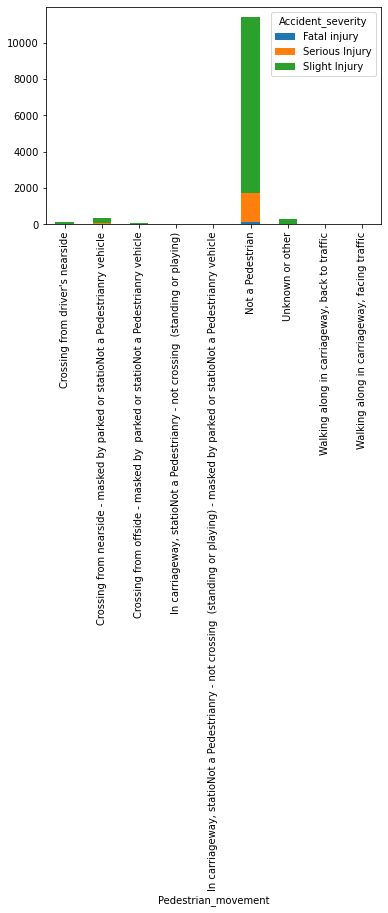

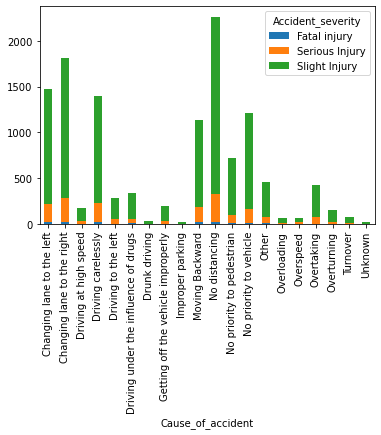

In [21]:
for col in data.drop('Accident_severity', axis=1):
    data_grouped = data.groupby(['Accident_severity',col]).size().reset_index().pivot(columns='Accident_severity',index=col,values=0)
    data_grouped.plot(kind='bar', stacked=True)



Accidents: Accidents occured mostly on fridays and least on Sundays. Most of the accidents occured on 8AM and between 3PM to 6PM (Office and school hours) 85% of the severity is Slight injury
    
Driver: 35% of the accident occured to drivers in age band 18-30 and 33% for drivers in age band 31-50. 94% of accidents occured to male drivers. Accidents occured mostly to persons having Junior High school educational background
    
Road: Accidents occured mostly on lanes having two-way (divided with broken lines road marking). Road alignment were accident occured mostly was tangent road with flat terrain with Yshaped type of Junction.

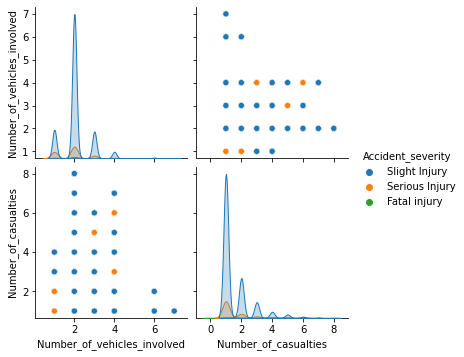

In [22]:
sns.pairplot(data, hue='Accident_severity')
plt.show()

In [23]:
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

# Outlier Detection

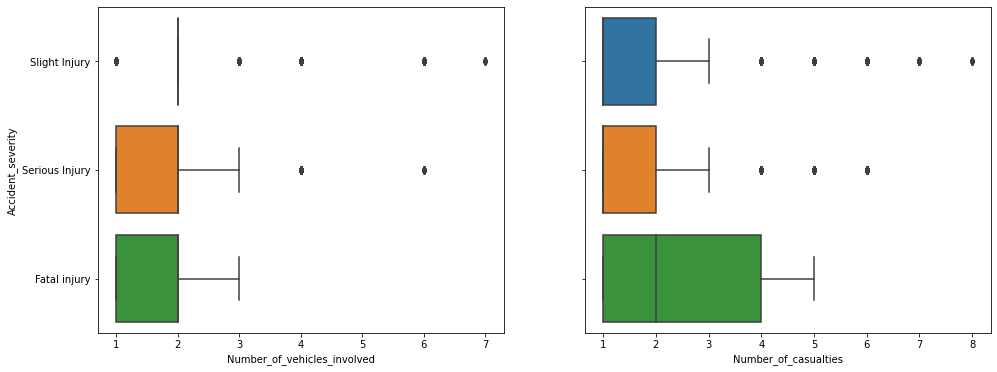

In [24]:
### Boxplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.boxplot(data = data, x = 'Number_of_vehicles_involved', y = 'Accident_severity', ax = ax1)
sns.boxplot(data = data, x = 'Number_of_casualties', y = 'Accident_severity', ax = ax2).set(yticklabels = [])
ax2.set_ylabel('')
plt.show()

In [25]:
# Since all the outliers are also important values, we are not removing them 

# 8. Handling Missing Values

In [26]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Inference:
We have found the null values in some columns. Let's have a look at it.

In [27]:
# Getting null columns only:

data.columns[data.isnull().sum()>0]

Index(['Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

In [28]:
### 8(a). We Will try to deal with each column.

In [29]:
#1. Education_level :
    
data['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

Inference:
As from above output, we can get there are null values and also, "Unknown" as value in the column which is also equal to null. (AS, if school is not known it is similar to null). Have to deal with that too!

In [30]:
# As per techniques of pandas, We can remove the columns/rows 
# which have more null/nan values. 
# so that our effort gets reduced

### how='all': If all values of row/column is null it will drop the vector
### thresh=24 : If the count of none/null values in row or column in more than 24, it drops the vector.

data.dropna(how='all',thresh=24,inplace=True)

In [31]:
data.shape

(12296, 32)

Inference:
Main rows are 12316 and current rows are 12295, few rows are removed as per specified threshold.

In [32]:
###8(b). Cleaning out Numerical Features.

In [33]:
### Let's analyze and clean out the numerical columns first.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[data.select_dtypes(include=numerics).columns]
print(numeric_features)

[Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')]


In [34]:
## Number_of vechicles_invloved

for feature in numeric_features:
    print(data[feature].isnull().sum())

Number_of_vehicles_involved    0
Number_of_casualties           0
dtype: int64


Inference:
As we can observe, the numerical features dont have any null values. But, It may have any incorrect/not accurate values (Example: 45 may be written as 45* and so on..). Need to concentrate on it.

In [35]:
### Lets check the values of the features, so that we can come across the unique value

data['Number_of_vehicles_involved'].value_counts()

2    8325
1    1995
3    1565
4     362
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

Inference:
No, incorrect values are present in "Number_of_vehicles_involved" Feature.

In [36]:
data['Number_of_casualties'].value_counts()

1    8384
2    2285
3     908
4     393
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

Inference: No, incorrect values are present in "NO: of casualities" Feature.

In [37]:
### Lets check out whether we need this numerical columns for our end result 
### and make a decision 
### to keep the features or remove it (If they are not necessary)

data.iloc[:,10:25].head()

Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty  
0               na              na  
1               na              na  
2  Driver or rider            Male  
3       Pedestrian          Female  
4               na              na

Inference:
    
* We really may need "Number_of_vehicles_involved" because that might be lead to severity of accident (for Example: If number of vehicles is 2 and If lorry and bike collided, then the severity of bike rider is severe, elif bike and bike slight injury, and so on.. cases).

* We may or may not need the "Number_of_vehicles_involved", but there is a 1 supporting case, so this may be a useful feature as data cannot be lost if there is a slight chance of dependency.

* Coming to "Number_of_casualities", we really dont consider the number of patients. As we are aiming for severity of accident. So, we can drop the "Number_of_casualities" column.

In [38]:
data.drop(['Number_of_casualties'],axis=1,inplace=True)

In [39]:
data.shape

(12296, 31)

In [40]:
###.     7(c). Dealing with Categorical Features

Treating Missing Values can be handled in two ways:

I. Deletion

linkcode
Deleting the entire rows/columns may result in information loss, it is recommended to use the technique when

A. entire row/column in null

B. 90% of values are null

C. Number of missing values are small.

II.Imputation

We have imputing techniques like Forward Fill, Backward Fill, Interpolate, Imputing with constant, central tendency imputations, using knn

In [41]:
data.select_dtypes(include=['object']).head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 30 columns]

Inference:
    
* Totally, we have 30 categorical features.

* 96% of features of dataset are categorical.

1. Observing useful features
As from the data, we are classifying the severity of accident happened.

So, we really dont need the date and time of particular instance. So, they can be left out.
Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

Sex_of_driver, can be considered.

Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.

Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not.

Driving_experience it may be useful, so we can consider

Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

Owner_of_vehicle, can be left out as we dont do any thing with owner.

Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle.

Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

Lanes_or_medians, can be considered.

Road_alignment, can be considered.

Types_of_junction, can be considered.

Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

Road_surface_conditions, can be considered like "Road_surface_type".

Light_conditions, can be considered because this may result in accidents.

Weather_conditions, can be considered.

Type_of_collision, can be considered.

Vehilce_movement, may be helpful.

Causalty_class, can be dropped.

Sex_of_casualty, can be dropped.

Age_band_of_casulity, can be considered.

Casuality_severity, can be considered.

Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

Fitness_of_casuality, can be considered.

Pedestrian_movement, can be dropped.

Cause_of_accident, can be considered.

In [42]:
### The columns with "Considerable" and "may be helpful" can be selected.

useful_features = ["Time","Age_band_of_driver","Sex_of_driver","Driving_experience","Type_of_vehicle","Service_year_of_vehicle"
                  ,"Defect_of_vehicle","Lanes_or_Medians","Road_allignment","Types_of_Junction"
                  ,"Road_surface_type","Road_surface_conditions","Light_conditions","Weather_conditions"
                  ,"Type_of_collision","Number_of_vehicles_involved","Vehicle_movement","Age_band_of_casualty",
                  "Casualty_severity","Fitness_of_casuality","Cause_of_accident","Accident_severity"]

In [43]:
print(f"From observations, we got {len(useful_features)} useful features whose missing values are to be treated!")

From observations, we got 22 useful features whose missing values are to be treated!


In [44]:
useful_data = data[useful_features]

In [45]:
useful_data.head()

Time Age_band_of_driver Sex_of_driver Driving_experience  \
0  17:02:00              18-30          Male              1-2yr   
1  17:02:00              31-50          Male         Above 10yr   
2  17:02:00              18-30          Male              1-2yr   
3   1:06:00              18-30          Male             5-10yr   
4   1:06:00              18-30          Male              2-5yr   

       Type_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0           Automobile              Above 10yr         No defect   
1  Public (> 45 seats)                 5-10yrs         No defect   
2      Lorry (41?100Q)                     NaN         No defect   
3  Public (> 45 seats)                     NaN         No defect   
4                  NaN                 5-10yrs         No defect   

    Lanes_or_Medians                                Road_allignment  \
0                NaN                 Tangent road with flat terrain   
1  Undivided Two way                 Tangent road with flat terrain   
2              other                                            NaN   
3              other  Tangent road with mild grade and flat terrain   
4              other                 Tangent road with flat terrain   

  Types_of_Junction  ...       Light_conditions Weather_conditions  \
0       No junction  ...               Daylight             Normal   
1       No junction  ...               Daylight             Normal   
2       No junction  ...               Daylight             Normal   
3           Y Shape  ...  Darkness - lights lit             Normal   
4           Y Shape  ...  Darkness - lights lit             Normal   

                         Type_of_collision Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                           2   
1           Vehicle with vehicle collision                           2   
2          Collision with roadside objects                           2   
3           Vehicle with vehicle collision                           2   
4           Vehicle with vehicle collision                           2   

  Vehicle_movement  Age_band_of_casualty Casualty_severity  \
0   Going straight                    na                na   
1   Going straight                    na                na   
2   Going straight                 31-50                 3   
3   Going straight                 18-30                 3   
4   Going straight                    na                na   

  Fitness_of_casuality           Cause_of_accident Accident_severity  
0                  NaN             Moving Backward     Slight Injury  
1                  NaN                  Overtaking     Slight Injury  
2                  NaN   Changing lane to the left    Serious Injury  
3               Normal  Changing lane to the right     Slight Injury  
4                  NaN                  Overtaking     Slight Injury  

[5 rows x 22 columns]

In [46]:
#### Checking null values for the useful data:

useful_data.isnull().sum()

Time                              0
Age_band_of_driver                0
Sex_of_driver                     0
Driving_experience              809
Type_of_vehicle                 932
Service_year_of_vehicle        3908
Defect_of_vehicle              4407
Lanes_or_Medians                377
Road_allignment                 138
Types_of_Junction               887
Road_surface_type               169
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Vehicle_movement                307
Age_band_of_casualty              0
Casualty_severity                 0
Fitness_of_casuality           2620
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [47]:
useful_data['Fitness_of_casuality'].value_counts()

Normal          9604
NormalNormal      19
Deaf              18
Blind             18
Other             17
Name: Fitness_of_casuality, dtype: int64

Inference:
    
* As, most people would be normal, we can replace the null values with most frequent using imputation.

* We can observe the NormalNormal is same as Normal, so need to correct them.

In [48]:
useful_data['Fitness_of_casuality'].fillna(useful_data['Fitness_of_casuality'].mode()[0], inplace = True)

C:\Users\sudhe\AppData\Local\Temp\ipykernel_1064\607299401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['Fitness_of_casuality'].fillna(useful_data['Fitness_of_casuality'].mode()[0], inplace = True)


In [49]:
useful_data['Fitness_of_casuality'].isnull().sum()

0

In [50]:
## Replacing Normalnormal with Normal:

useful_data['Fitness_of_casuality'].replace('NormalNormal','Normal',inplace=True)
useful_data['Fitness_of_casuality'].value_counts()

C:\Users\sudhe\AppData\Local\Temp\ipykernel_1064\3286914169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['Fitness_of_casuality'].replace('NormalNormal','Normal',inplace=True)


Normal    12243
Deaf         18
Blind        18
Other        17
Name: Fitness_of_casuality, dtype: int64

In [51]:
useful_data['Fitness_of_casuality']

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
12311    Normal
12312    Normal
12313    Normal
12314    Normal
12315    Normal
Name: Fitness_of_casuality, Length: 12296, dtype: object

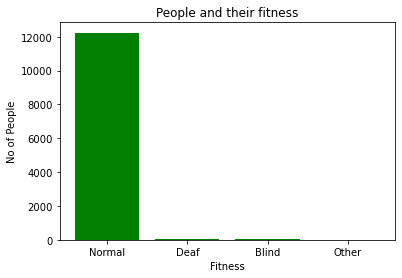

In [52]:
## Visualization of 'Fitness_of_casuality' feature.

data = useful_data['Fitness_of_casuality'].value_counts()
keys = ['Normal','Deaf','Blind','Other']

plt.bar(keys,data,color='green')
plt.xlabel("Fitness")
plt.ylabel("No of People")
plt.title("People and their fitness")
plt.show()


Inference:
    
* Most of people are normally fit.
* only a few are deaf and blind.

In [53]:
## Checking for next column to deal with nan values

def display_nullColumns(dataframe):
    for col in dataframe.columns:
        if dataframe[col].isnull().sum()>0:
            print(col,dataframe[col].isnull().sum())
display_nullColumns(useful_data)

Driving_experience 809
Type_of_vehicle 932
Service_year_of_vehicle 3908
Defect_of_vehicle 4407
Lanes_or_Medians 377
Road_allignment 138
Types_of_Junction 887
Road_surface_type 169
Type_of_collision 155
Vehicle_movement 307


In [54]:
# Driving_experience

useful_data['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

Inference:
We can convert the null values to Unknown as trial and error(experimental way)

In [55]:
useful_data['Driving_experience'].fillna('unknown',inplace=True)
useful_data['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
unknown        842
No Licence     118
Name: Driving_experience, dtype: int64

In [56]:
useful_data['Driving_experience'].isnull().sum()

0

In [57]:
## Visualization of 'Driving_experience' feature.

<AxesSubplot:ylabel='Driving_experience'>

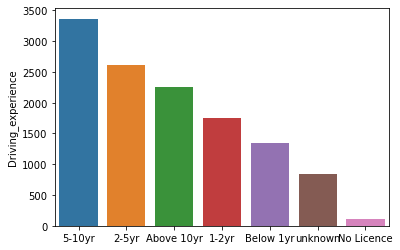

In [58]:
data = useful_data['Driving_experience'].value_counts()
keys = ['5-10yr','2-5yr','Above 10yr','1-2yr','Below 1yr','unknown','No Licence']
sns.barplot(x = keys, y=data)

In [59]:
display_nullColumns(useful_data)

Type_of_vehicle 932
Service_year_of_vehicle 3908
Defect_of_vehicle 4407
Lanes_or_Medians 377
Road_allignment 138
Types_of_Junction 887
Road_surface_type 169
Type_of_collision 155
Vehicle_movement 307


In [60]:
useful_data['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         810
Public (12 seats)        711
Stationwagen             686
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

Inference:
    
* Firstly, we can point out some values of features have misspelled values.

* We can clean them out initially.

* As, we can not be sure of What (41 ? 100Q) really means for lorry, we can convert all the terms to lorry which have similar symbol data.

* The value "Pick up upto 10Q" doesn't really make any value, we can convert it to lorry as it has Q term.

* And the "?" along in public feature is similar to "to(-)", example it can be Public(13-45 Seats) Vehicle

In [61]:
useful_data['Type_of_vehicle'].replace(['Lorry (41?100Q)','Lorry (11?40Q)','Pick up upto 10Q'],'Lorry',inplace=True)

In [62]:
useful_data['Type_of_vehicle'].replace(['Public (13?45 seats)'],'Public (13-45 seats)',inplace=True)
useful_data['Type_of_vehicle'].value_counts()

Lorry                   3537
Automobile              3205
Other                   1208
Public (12 seats)        711
Stationwagen             686
Public (13-45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [63]:
## Missing values can be tried out with mostfrequent,

useful_data['Type_of_vehicle'].fillna('Lorry',inplace=True)
useful_data['Type_of_vehicle'].isnull().sum()

0

In [64]:
useful_data['Type_of_vehicle'].value_counts()

Lorry                   4469
Automobile              3205
Other                   1208
Public (12 seats)        711
Stationwagen             686
Public (13-45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

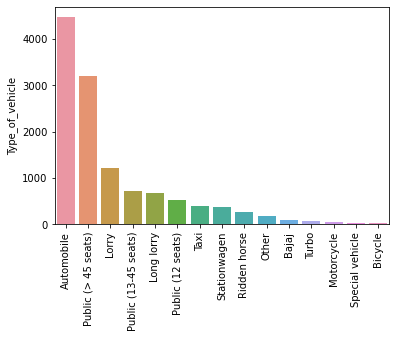

In [65]:
data = useful_data['Type_of_vehicle'].value_counts()
keys = useful_data['Type_of_vehicle'].unique()
sns.barplot(x = keys, y=data)
plt.xticks(rotation=90);

In [66]:
display_nullColumns(useful_data)

Service_year_of_vehicle 3908
Defect_of_vehicle 4407
Lanes_or_Medians 377
Road_allignment 138
Types_of_Junction 887
Road_surface_type 169
Type_of_collision 155
Vehicle_movement 307


In [67]:
useful_data['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [68]:
## can convert null to Unknown
useful_data['Service_year_of_vehicle'].fillna('Unknown',inplace=True)
useful_data['Service_year_of_vehicle'].isnull().sum()

0

In [69]:
useful_data['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

Inference:
As, the wrong values have been filled in 'Type_of_defect of vehicle', we can assign 'No defect' to every value

In [70]:
useful_data['Defect_of_vehicle'].replace([None,'7','5'],'No defect',inplace=True)
useful_data['Defect_of_vehicle'].value_counts()

No defect    12296
Name: Defect_of_vehicle, dtype: int64

In [71]:
#Road_surface_type
useful_data['Road_surface_type'].value_counts()

Asphalt roads                       11280
Earth roads                           358
Gravel roads                          241
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [72]:
# Lanes_or_Medians 377

useful_data['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4405
Undivided Two way                                   3792
other                                               1658
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: Lanes_or_Medians, dtype: int64

Inference:
As, we have "Unknown" value, we can convert none to "Unknown"

In [73]:
useful_data['Lanes_or_Medians'].fillna("Unknown",inplace=True)
useful_data['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4405
Undivided Two way                                   3792
other                                               1658
Double carriageway (median)                         1020
One way                                              845
Unknown                                              434
Two-way (divided with solid lines road marking)      142
Name: Lanes_or_Medians, dtype: int64

In [74]:
useful_data['Road_allignment'].value_counts()

Tangent road with flat terrain                   10444
Tangent road with mild grade and flat terrain      500
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

Inference:
As we dont have "unknown" value, we can assign most frequent to none values

In [75]:
useful_data['Types_of_Junction'].value_counts()

Y Shape        4536
No junction    3830
Crossing       2172
Other           444
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [76]:
useful_data['Road_surface_type'].value_counts()

Asphalt roads                       11280
Earth roads                           358
Gravel roads                          241
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [77]:
useful_data['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8761
Collision with roadside objects            1785
Collision with pedestrians                  891
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    8
Name: Type_of_collision, dtype: int64

In [78]:
useful_data['Vehicle_movement'].value_counts()

Going straight         8144
Moving Backward         984
Other                   937
Reversing               563
Turnover                489
Getting off             337
Entering a junction     192
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   49
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64

Inference:
We can convert all None values to most frequent values.

In [79]:
useful_data['Road_surface_type'].fillna(useful_data['Road_surface_type'].mode()[0],inplace=True)
useful_data['Road_allignment'].fillna(useful_data['Road_allignment'].mode()[0], inplace=True)
useful_data['Type_of_collision'].fillna(useful_data['Type_of_collision'].mode()[0], inplace=True)
useful_data['Vehicle_movement'].fillna(useful_data['Vehicle_movement'].mode()[0], inplace=True)
useful_data['Lanes_or_Medians'].fillna(useful_data['Lanes_or_Medians'].mode()[0], inplace=True)
useful_data['Types_of_Junction'].fillna(useful_data['Types_of_Junction'].mode()[0], inplace=True)

In [80]:
useful_data.isnull().sum().sum()

0

Inference:
* No Null values are present.

# 9.Feature Engineering

In [81]:
#Extracting hour from time

useful_data['Hour'] = pd.to_datetime(useful_data['Time']).dt.hour
useful_data.head()

Time Age_band_of_driver Sex_of_driver Driving_experience  \
0  17:02:00              18-30          Male              1-2yr   
1  17:02:00              31-50          Male         Above 10yr   
2  17:02:00              18-30          Male              1-2yr   
3   1:06:00              18-30          Male             5-10yr   
4   1:06:00              18-30          Male              2-5yr   

       Type_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0           Automobile              Above 10yr         No defect   
1  Public (> 45 seats)                 5-10yrs         No defect   
2                Lorry                 Unknown         No defect   
3  Public (> 45 seats)                 Unknown         No defect   
4                Lorry                 5-10yrs         No defect   

    Lanes_or_Medians                                Road_allignment  \
0            Unknown                 Tangent road with flat terrain   
1  Undivided Two way                 Tangent road with flat terrain   
2              other                 Tangent road with flat terrain   
3              other  Tangent road with mild grade and flat terrain   
4              other                 Tangent road with flat terrain   

  Types_of_Junction  ... Weather_conditions  \
0       No junction  ...             Normal   
1       No junction  ...             Normal   
2       No junction  ...             Normal   
3           Y Shape  ...             Normal   
4           Y Shape  ...             Normal   

                         Type_of_collision Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                           2   
1           Vehicle with vehicle collision                           2   
2          Collision with roadside objects                           2   
3           Vehicle with vehicle collision                           2   
4           Vehicle with vehicle collision                           2   

  Vehicle_movement Age_band_of_casualty  Casualty_severity  \
0   Going straight                   na                 na   
1   Going straight                   na                 na   
2   Going straight                31-50                  3   
3   Going straight                18-30                  3   
4   Going straight                   na                 na   

  Fitness_of_casuality           Cause_of_accident Accident_severity Hour  
0               Normal             Moving Backward     Slight Injury   17  
1               Normal                  Overtaking     Slight Injury   17  
2               Normal   Changing lane to the left    Serious Injury   17  
3               Normal  Changing lane to the right     Slight Injury    1  
4               Normal                  Overtaking     Slight Injury    1  

[5 rows x 23 columns]

In [82]:
useful_data.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Vehicle_movement',
       'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
       'Cause_of_accident', 'Accident_severity', 'Hour'],
      dtype='object')

In [83]:
data1 = useful_data.drop(['Time'],axis=1)

# 10. Encoding

* Converting Categorical Feature values to numerical values using Label Encoding.

* Label Encoding provides values from 1 to N.

In [84]:
# Encoded Data:

label_encoder = preprocessing.LabelEncoder()

col = data1.columns
for col in data1:
    data1[col] = label_encoder.fit_transform(data1[col])

data1.head()



Age_band_of_driver  Sex_of_driver  Driving_experience  Type_of_vehicle  \
0                   0              1                   0                0   
1                   1              1                   3                9   
2                   0              1                   0                4   
3                   0              1                   2                9   
4                   0              1                   1                4   

   Service_year_of_vehicle  Defect_of_vehicle  Lanes_or_Medians  \
0                        3                  0                 5   
1                        2                  0                 4   
2                        5                  0                 6   
3                        5                  0                 6   
4                        2                  0                 6   

   Road_allignment  Types_of_Junction  Road_surface_type  ...  \
0                5                  1                  0  ...   
1                5                  1                  0  ...   
2                5                  1                  0  ...   
3                6                  7                  2  ...   
4                5                  7                  0  ...   

   Weather_conditions  Type_of_collision  Number_of_vehicles_involved  \
0                   2                  3                            1   
1                   2                  8                            1   
2                   2                  2                            1   
3                   2                  8                            1   
4                   2                  8                            1   

   Vehicle_movement  Age_band_of_casualty  Casualty_severity  \
0                 2                     5                  3   
1                 2                     5                  3   
2                 2                     1                  2   
3                 2                     0                  2   
4                 2                     5                  3   

   Fitness_of_casuality  Cause_of_accident  Accident_severity  Hour  
0                     2                  9                  2    17  
1                     2                 16                  2    17  
2                     2                  0                  1    17  
3                     2                  1                  2     1  
4                     2                 16                  2     1  

[5 rows x 22 columns]

In [85]:
useful_data.drop([ 'Time','Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Vehicle_movement',
       'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
       'Cause_of_accident', 'Accident_severity', 'Hour'],axis=1,inplace=True)

In [86]:
useful_data = pd.concat([useful_data,data1],axis=1)

In [87]:
useful_data.head()


Age_band_of_driver  Sex_of_driver  Driving_experience  Type_of_vehicle  \
0                   0              1                   0                0   
1                   1              1                   3                9   
2                   0              1                   0                4   
3                   0              1                   2                9   
4                   0              1                   1                4   

   Service_year_of_vehicle  Defect_of_vehicle  Lanes_or_Medians  \
0                        3                  0                 5   
1                        2                  0                 4   
2                        5                  0                 6   
3                        5                  0                 6   
4                        2                  0                 6   

   Road_allignment  Types_of_Junction  Road_surface_type  ...  \
0                5                  1                  0  ...   
1                5                  1                  0  ...   
2                5                  1                  0  ...   
3                6                  7                  2  ...   
4                5                  7                  0  ...   

   Weather_conditions  Type_of_collision  Number_of_vehicles_involved  \
0                   2                  3                            1   
1                   2                  8                            1   
2                   2                  2                            1   
3                   2                  8                            1   
4                   2                  8                            1   

   Vehicle_movement  Age_band_of_casualty  Casualty_severity  \
0                 2                     5                  3   
1                 2                     5                  3   
2                 2                     1                  2   
3                 2                     0                  2   
4                 2                     5                  3   

   Fitness_of_casuality  Cause_of_accident  Accident_severity  Hour  
0                     2                  9                  2    17  
1                     2                 16                  2    17  
2                     2                  0                  1    17  
3                     2                  1                  2     1  
4                     2                 16                  2     1  

[5 rows x 22 columns]

In [88]:
useful_data.shape

(12296, 22)

Inference:
As we can observe, all values are ranked based on value.

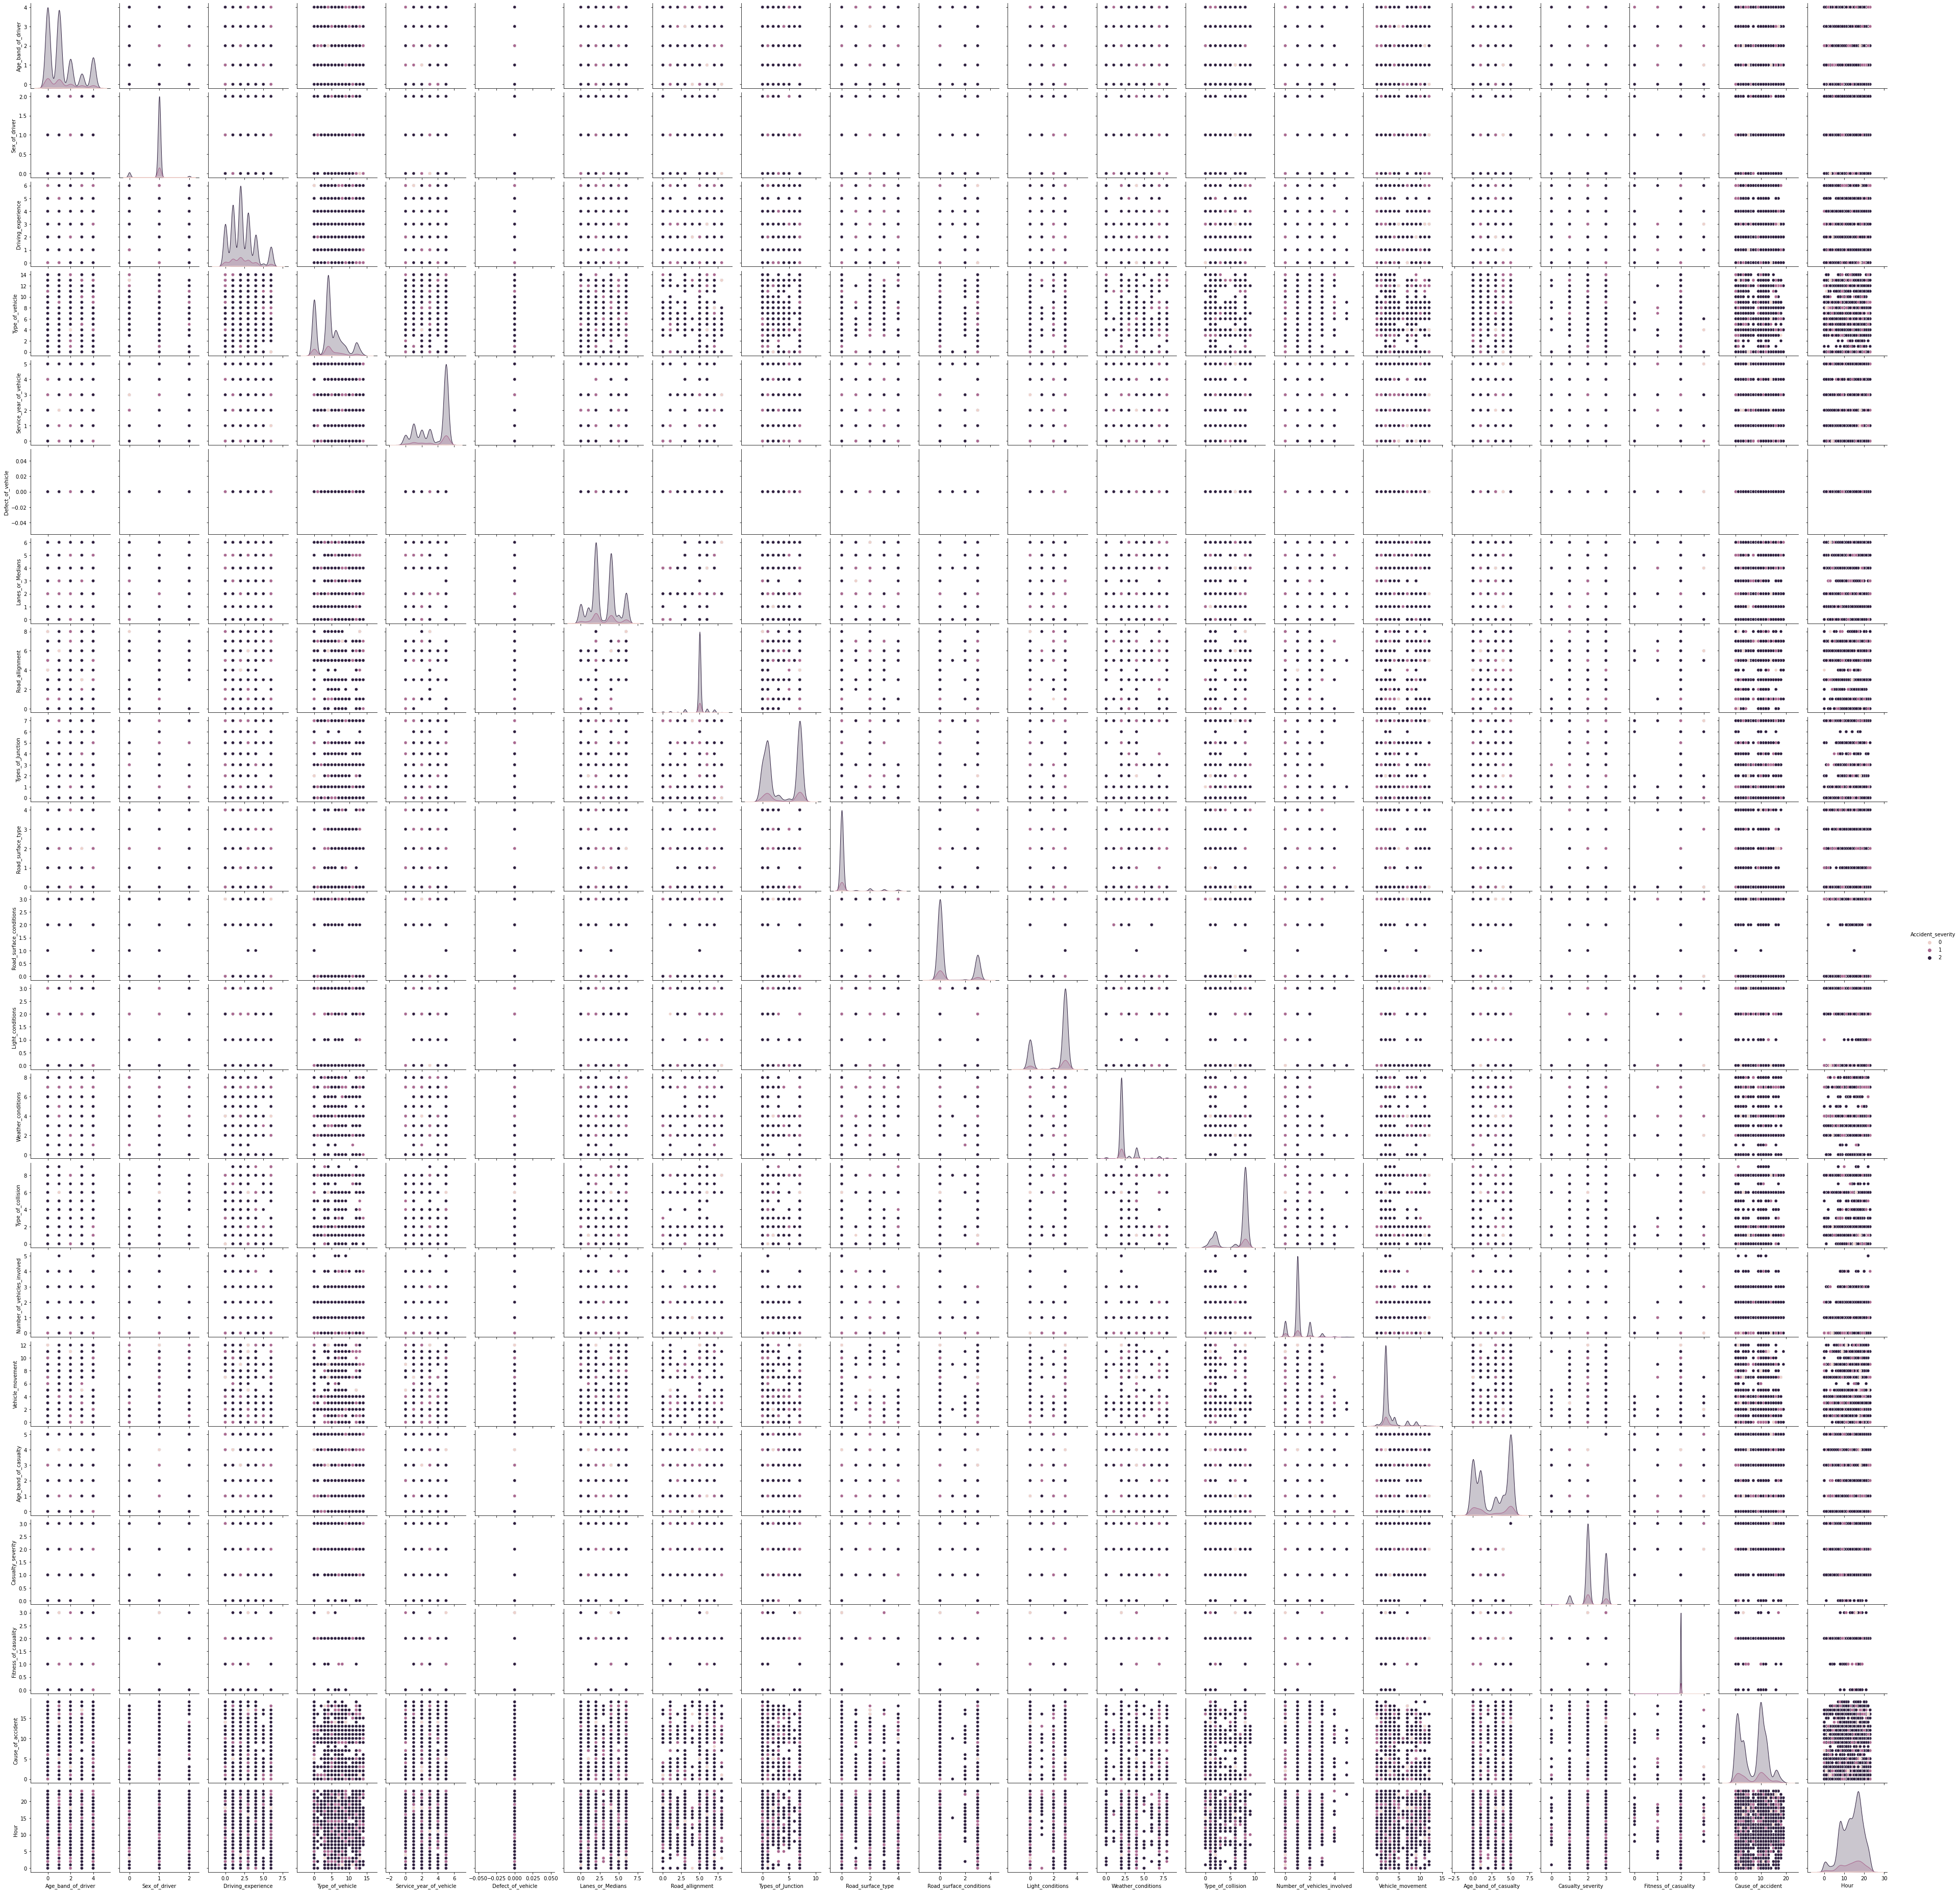

In [89]:
sns.pairplot(useful_data, hue='Accident_severity')
plt.show()




In [90]:
useful_data.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Vehicle_movement',
       'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
       'Cause_of_accident', 'Accident_severity', 'Hour'],
      dtype='object')

In [91]:
useful_data.dtypes

Age_band_of_driver             int32
Sex_of_driver                  int32
Driving_experience             int32
Type_of_vehicle                int32
Service_year_of_vehicle        int32
Defect_of_vehicle              int32
Lanes_or_Medians               int32
Road_allignment                int32
Types_of_Junction              int32
Road_surface_type              int32
Road_surface_conditions        int32
Light_conditions               int32
Weather_conditions             int32
Type_of_collision              int32
Number_of_vehicles_involved    int64
Vehicle_movement               int32
Age_band_of_casualty           int32
Casualty_severity              int32
Fitness_of_casuality           int32
Cause_of_accident              int32
Accident_severity              int32
Hour                           int64
dtype: object

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = useful_data.drop('Accident_severity', axis=1)
y = useful_data['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9836, 21) (2460, 21) (9836,) (2460,)


In [95]:
X.describe()

Age_band_of_driver  Sex_of_driver  Driving_experience  Type_of_vehicle  \
count        12296.000000   12296.000000        12296.000000     12296.000000   
mean             1.293754       0.957385            2.206815         4.400049   
std              1.338180       0.263808            1.594905         3.572080   
min              0.000000       0.000000            0.000000         0.000000   
25%              0.000000       1.000000            1.000000         0.000000   
50%              1.000000       1.000000            2.000000         4.000000   
75%              2.000000       1.000000            3.000000         6.000000   
max              4.000000       2.000000            6.000000        14.000000   

       Service_year_of_vehicle  Defect_of_vehicle  Lanes_or_Medians  \
count             12296.000000            12296.0      12296.000000   
mean                  3.530172                0.0          3.038956   
std                   1.801017                0.0          1.744015   
min                   0.000000                0.0          0.000000   
25%                   2.000000                0.0          2.000000   
50%                   5.000000                0.0          2.000000   
75%                   5.000000                0.0          4.000000   
max                   5.000000                0.0          6.000000   

       Road_allignment  Types_of_Junction  Road_surface_type  ...  \
count     12296.000000       12296.000000       12296.000000  ...   
mean          4.929896           3.636792           0.177944  ...   
std           0.903546           3.094629           0.696512  ...   
min           0.000000           0.000000           0.000000  ...   
25%           5.000000           1.000000           0.000000  ...   
50%           5.000000           2.000000           0.000000  ...   
75%           5.000000           7.000000           0.000000  ...   
max           8.000000           7.000000           4.000000  ...   

       Light_conditions  Weather_conditions  Type_of_collision  \
count      12296.000000        12296.000000       12296.000000   
mean           2.176887            2.415420           6.406067   
std            1.324474            1.146738           2.725947   
min            0.000000            0.000000           0.000000   
25%            0.000000            2.000000           6.000000   
50%            3.000000            2.000000           8.000000   
75%            3.000000            2.000000           8.000000   
max            3.000000            8.000000           9.000000   

       Number_of_vehicles_involved  Vehicle_movement  Age_band_of_casualty  \
count                 12296.000000      12296.000000          12296.000000   
mean                      1.036435          2.865566              2.621340   
std                       0.667717          2.057426              2.121118   
min                       0.000000          0.000000              0.000000   
25%                       1.000000          2.000000              0.000000   
50%                       1.000000          2.000000              3.000000   
75%                       1.000000          3.000000              5.000000   
max                       5.000000         12.000000              5.000000   

       Casualty_severity  Fitness_of_casuality  Cause_of_accident  \
count       12296.000000          12296.000000       12296.000000   
mean            2.293998              1.996991           6.914606   
std             0.587811              0.093240           5.100330   
min             0.000000              0.000000           0.000000   
25%             2.000000              2.000000           1.000000   
50%             2.000000              2.000000           9.000000   
75%             3.000000              2.000000          11.000000   
max             3.000000              3.000000          19.000000   

               Hour  
count  12296.000000  
mean      13.835882  
std        5.204440  
min    

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
logit_model = lr.fit(X_train, y_train)
y_predict_logit = logit_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_logit)

C:\Users\sudhe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8504065040650407

# KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = range(1,25)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train,y_train)
  y_pred_kNN = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

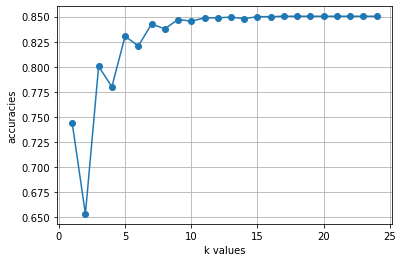

In [98]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [102]:
classifier = KNeighborsClassifier(n_neighbors=17)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)

In [103]:
accuracy_score(y_test,y_pred_kNN)

0.8504065040650407

# K-Fold cross validation

In [104]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

In [105]:
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 1230  1231  1232 ... 12293 12294 12295]
Test Index: [   0    1    2 ... 1227 1228 1229]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [1230 1231 1232 ... 2457 2458 2459]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [2460 2461 2462 ... 3687 3688 3689]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [3690 3691 3692 ... 4917 4918 4919]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [4920 4921 4922 ... 6147 6148 6149]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [6150 6151 6152 ... 7377 7378 7379]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [7380 7381 7382 ... 8606 8607 8608]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [8609 8610 8611 ... 9835 9836 9837]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 9838  9839  9840 ... 11064 11065 11066]
Training Index: [    0     1     2 ... 1

In [106]:
from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(classifier,X,y, cv=kfold_validator)
cv_result1

array([0.80243902, 0.91382114, 0.91219512, 0.83089431, 0.85284553,
       0.85447154, 0.86574451, 0.81041497, 0.78844589, 0.82017901])

In [107]:
np.mean(cv_result1)

0.8451451044209384

# Stratified K-Fold Cross Validation

In [108]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)

In [109]:
from sklearn.model_selection import StratifiedKFold

In [110]:
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [  922   923   924 ... 12293 12294 12295]
Test Index: [   0    1    2 ... 1293 1294 1295]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 922  923  924 ... 4148 4149 4150]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [2426 2427 2428 ... 5108 5183 5329]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [3560 3561 3562 ... 5949 5987 5988]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [4805 4806 4807 ... 7277 7278 7332]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [6024 6025 6026 ... 9051 9251 9279]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 7234  7235  7236 ... 10089 10108 10109]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 8450  8451  8452 ... 10649 10650 10651]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 9727  9728  9729 ... 11688 11689 11708]
Training Index: [    0     1

In [111]:
skcv_result1 = cross_val_score(classifier,X,y, cv=skfold_validator)
skcv_result1

array([0.84552846, 0.84471545, 0.84552846, 0.84552846, 0.84552846,
       0.84471545, 0.84703011, 0.84540277, 0.84540277, 0.84377543])

In [112]:
np.mean(skcv_result1)

0.8453155781354397

# SVM Model

In [113]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred_svm)

0.8504065040650407

# K-Fold cross validation with SVM

In [115]:
kfold_validator = KFold(10)
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 1230  1231  1232 ... 12293 12294 12295]
Test Index: [   0    1    2 ... 1227 1228 1229]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [1230 1231 1232 ... 2457 2458 2459]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [2460 2461 2462 ... 3687 3688 3689]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [3690 3691 3692 ... 4917 4918 4919]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [4920 4921 4922 ... 6147 6148 6149]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [6150 6151 6152 ... 7377 7378 7379]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [7380 7381 7382 ... 8606 8607 8608]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [8609 8610 8611 ... 9835 9836 9837]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 9838  9839  9840 ... 11064 11065 11066]
Training Index: [    0     1     2 ... 1

In [116]:
cv_result2 = cross_val_score(clf_svm,X,y, cv=kfold_validator)
cv_result2

array([0.80243902, 0.91463415, 0.91300813, 0.83170732, 0.85284553,
       0.85528455, 0.86574451, 0.81041497, 0.78844589, 0.82099268])

In [117]:
np.mean(cv_result2)

0.8455516746379832

# Stratified K-Fold Cross Validation with SVM

In [118]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [119]:
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [  922   923   924 ... 12293 12294 12295]
Test Index: [   0    1    2 ... 1293 1294 1295]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 922  923  924 ... 4148 4149 4150]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [2426 2427 2428 ... 5108 5183 5329]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [3560 3561 3562 ... 5949 5987 5988]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [4805 4806 4807 ... 7277 7278 7332]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [6024 6025 6026 ... 9051 9251 9279]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 7234  7235  7236 ... 10089 10108 10109]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 8450  8451  8452 ... 10649 10650 10651]
Training Index: [    0     1     2 ... 12293 12294 12295]
Test Index: [ 9727  9728  9729 ... 11688 11689 11708]
Training Index: [    0     1

In [120]:
skcv_result2 = cross_val_score(clf_svm,X,y, cv=skfold_validator)
skcv_result2

array([0.84552846, 0.84552846, 0.84552846, 0.84552846, 0.84552846,
       0.84552846, 0.84621644, 0.84540277, 0.84540277, 0.84540277])

In [121]:
np.mean(skcv_result2)

0.8455595467264683

# Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_clf = rf_clf.predict(X_test)

In [124]:
accuracy_score(y_test,y_pred_clf)

0.8508130081300813